<a href="https://colab.research.google.com/github/jcvl-udg/collab_notebooks/blob/main/WSC_1_Tutorial00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Working with Celestial Coordinates in WCS 1: Specifying, reading, and plotting](https://learn.astropy.org/tutorials/celestial_coords1.html)

In [1]:
!pip install astropy
!pip install matplotlib

Importamos herramientas necesarias

In [3]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt

### Section 1: Two ways to create an astropy.wcs.WCS object

### Method 1: Building a WCS object with a dictionary-¿
- Se puede generar la data con el formato FITS especifico que se ofrece en [esta pagina](https://fits.gsfc.nasa.gov/fits_wcs.html).



In [4]:
wcs_input_dict = {
    'CTYPE1': 'RA---TAN',
    'CUNIT1': 'deg',
    'CDELT1': -0.0002777777778,
    'CRPIX1': 1,
    'CRVAL1': 337.5202808,
    'NAXIS1': 1024,
    'CTYPE2': 'DEC--TAN',
    'CUNIT2': 'deg',
    'CDELT2': 0.0002777777778,
    'CRPIX2': 1,
    'CRVAL2': -20.833333059999998,
    'NAXIS2': 1024
}
wcs_helix_dict = WCS(wcs_input_dict)

In [5]:
wcs_helix_dict # To check output

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 337.5202808 -20.833333059999998 
CRPIX : 1.0 1.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.0002777777778 0.0002777777778 
NAXIS : 1024  1024

- CRVALn: the coordinate value at a reference point (e.g., RA and DEC value in degrees)
- CRPIXn: the pixel location of the reference point (e.g., CRPIX1=1, CRPIX2=1 describes the center of a corner pixel)
- CDELTn: the coordinate increment at the reference point (e.g., the difference in 'RA' value from the reference pixel to its neighbor along the RA axis)
- CTYPEn: an 8-character string describing the axis type (e.g., 'RA---TAN' and 'DEC---TAN' describe the typical tangent-plane sky projection that astronomers use)
- CUNITn: a string describing the unit for each axis (if not specified, the default unit is degrees.)
- NAXISn: an integer defining the number of pixels in each axis

### Method 2: Create an empty WCS object before assigning values

In [6]:
wcs_helix_list = WCS(naxis=2)
wcs_helix_list.wcs.crpix = [1, 1]
wcs_helix_list.wcs.crval = [337.5202808, -20.833333059999998]
wcs_helix_list.wcs.cunit = ["deg", "deg"]
wcs_helix_list.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs_helix_list.wcs.cdelt = [-0.0002777777778, 0.0002777777778]

In [7]:
wcs_helix_list # To check output

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 337.5202808 -20.833333059999998 
CRPIX : 1.0 1.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.0002777777778 0.0002777777778 
NAXIS : 0  0

Note that when we initialize the WCS object this way, the NAXIS values are set to 0. To assign coordinates to our image, we will need to fix the shape of the WCS object array so that it matches our image. We can do this by assigning a value to the array_shape attribute of the WCS object:

In [8]:
wcs_helix_list.array_shape = [1024, 1024]

In [9]:
wcs_helix_list

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 337.5202808 -20.833333059999998 
CRPIX : 1.0 1.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.0002777777778 0.0002777777778 
NAXIS : 1024  1024

# Section 2: Show an image of the Helix nebula with RA and Dec labeled

### Step 1: Read in the FITS file

In [10]:
header_data_unit_list = fits.open('https://github.com/astropy/astropy-data/raw/6d92878d18e970ce6497b70a9253f65c925978bf/tutorials/celestial-coords1/tailored_dss.22.29.38.50-20.50.13_60arcmin.fits')

In [11]:
header_data_unit_list.info()

Filename: /root/.astropy/cache/download/url/21d072715b8ee90ab2fe1405b0e5fb1a/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     121   (2119, 2119)   int16   


In [13]:
image = header_data_unit_list[0].data
header = header_data_unit_list[0].header

In [14]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2119                                                  
NAXIS2  =                 2119                                                  
DATE    = '03/09/19          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'J 10265           ' /Observatory plate label                         
PLATEID = '04I5              ' /GSSS Plate ID                                   
REGION  = 'S602              ' /GSSS Region Name                                
DATE-OBS= '1985-06-15'         / UT date of Observation                         
UT      = '18:30:00.00       ' /UT time of observation                          
EPOCH   =  1.9854542236328E+

### Step 2: Read in the FITS image coordinate system with astropy.wcs.WCS

In [15]:
wcs_helix = WCS(header)

In [16]:
wcs_helix

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 336.6811440416667 -19.745016572222223 
CRPIX : 2499.6447489941065 3378.9002584168584 
PC1_1 PC1_2  : 0.025282857855146917 4.4684674035885186e-05 
PC2_1 PC2_2  : -4.8420685266167345e-05 0.0252859566668733 
CDELT : -0.01867333422948538 0.01867333422948538 
NAXIS : 2119  2119

### Step 3: Plot the Helix nebula with sky coordinate axes (RA and Dec)

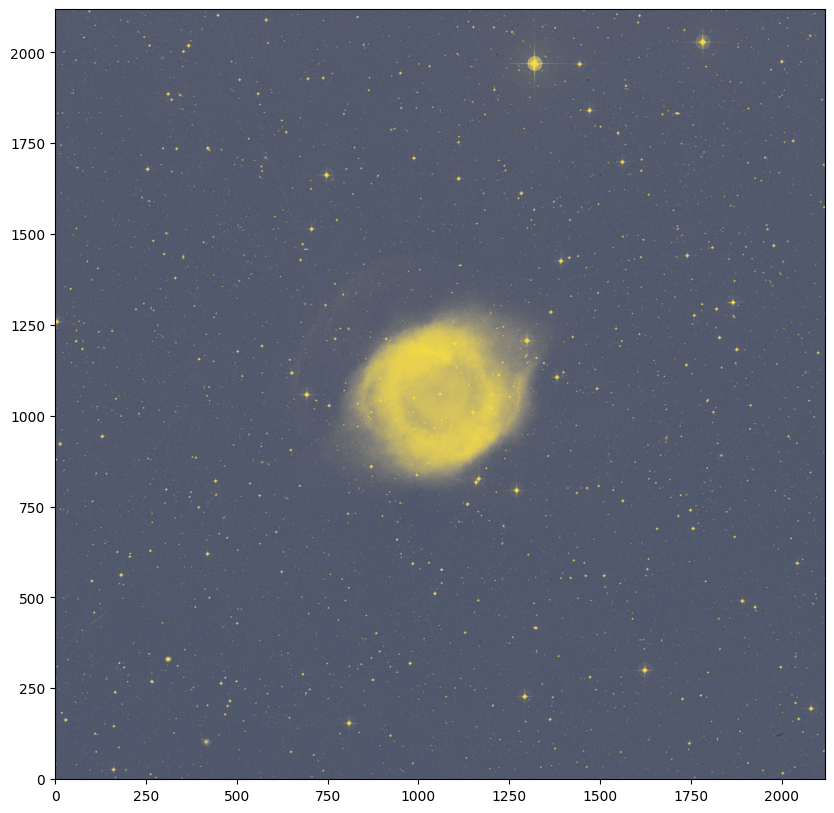

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, origin='lower', cmap='cividis')

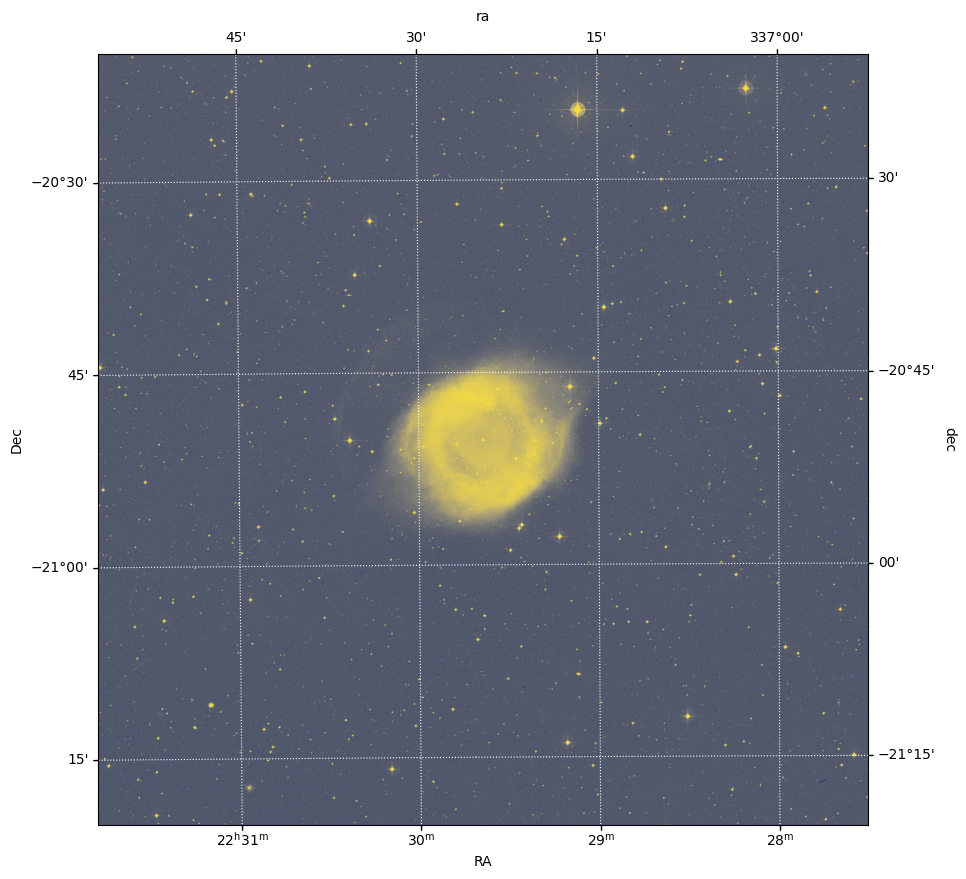

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')

## Exercise

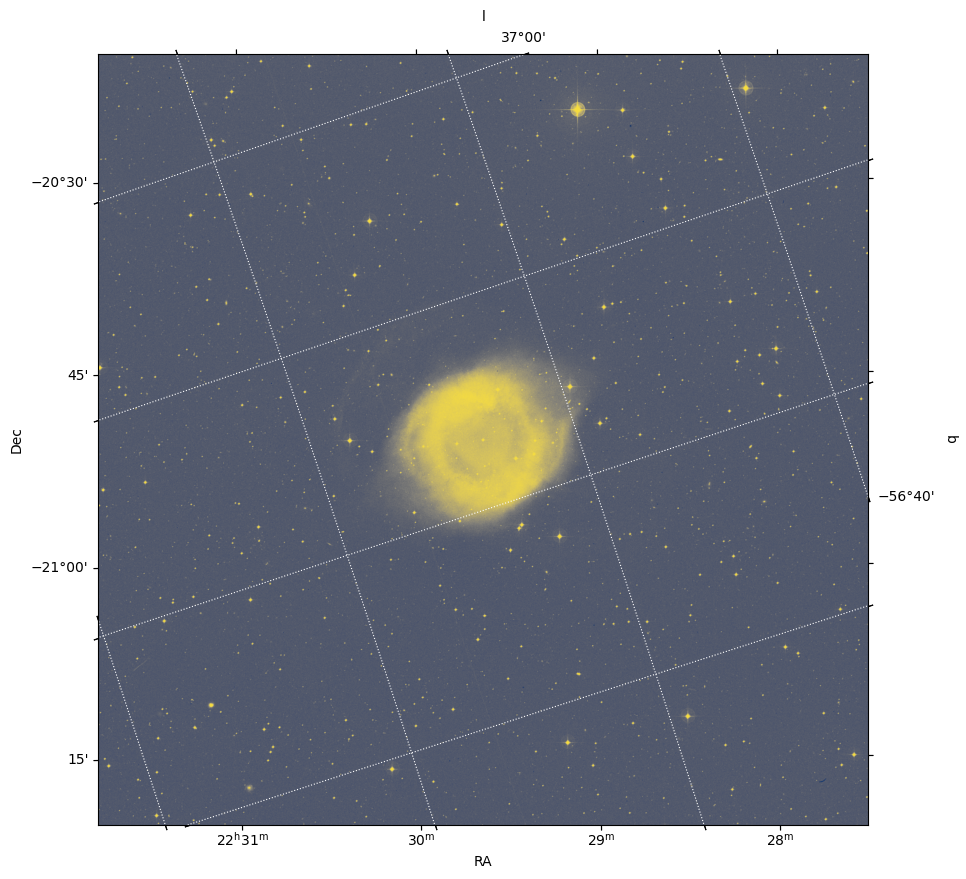

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='white', ls='dotted')

### Section 3: Plot a scale marker on an image with WCS

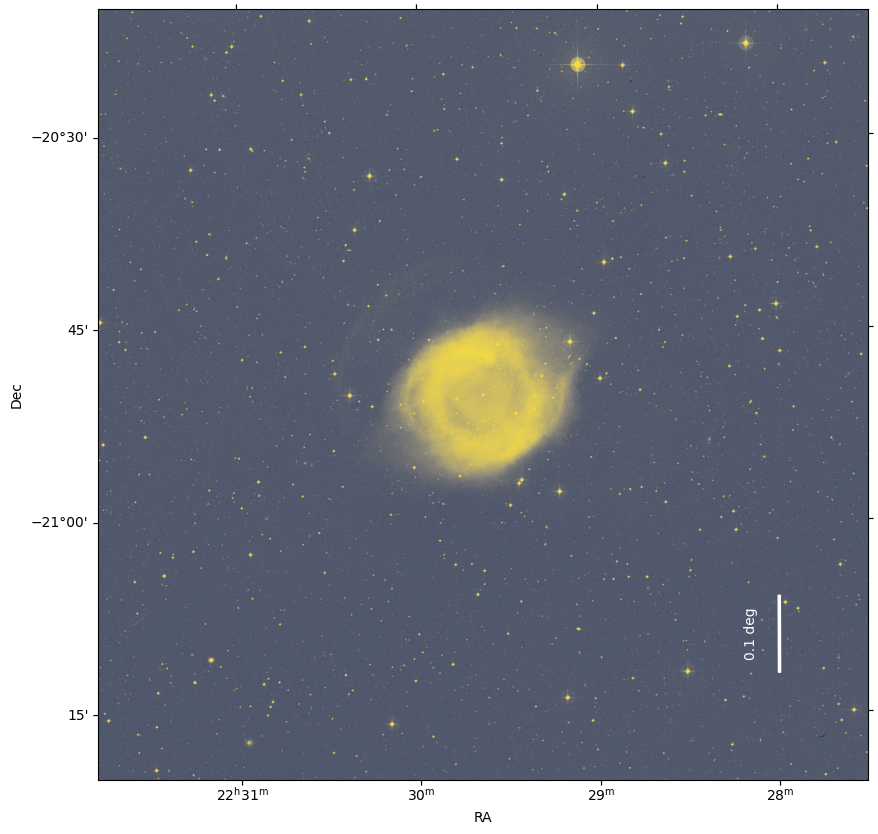

In [20]:
fig = plt.figure(figsize=(10, 10), frameon=False)
ax = plt.subplot(projection=wcs_helix)
ax.arrow(337, -21.2, 0, 0.1,
         head_width=0, head_length=0,
         fc='white', ec='white', width=0.003,
         transform=ax.get_transform('icrs'))
plt.text(337.05, -21.18, '0.1 deg',
         color='white', rotation=90,
         transform=ax.get_transform('icrs'))
plt.imshow(image, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

### Exercise
Make a horizontal bar with the same length. Keep in mind that 1 hour angle = 15 degrees.

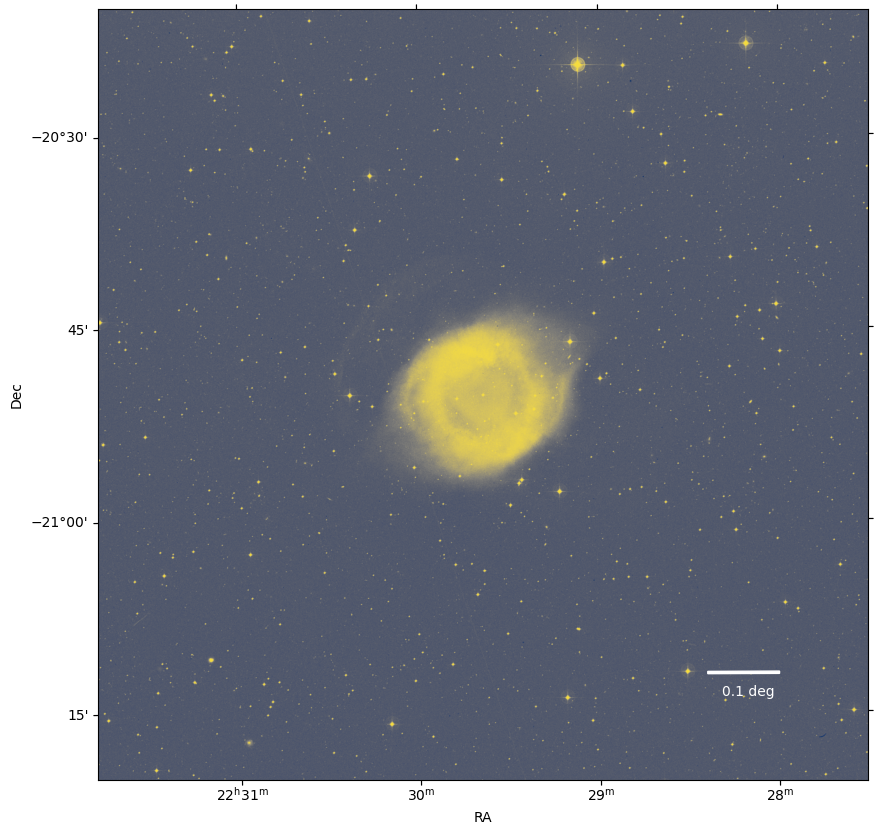

In [42]:
fig = plt.figure(figsize=(10, 10), frameon=False)
ax = plt.subplot(projection=wcs_helix)
# Horizontal reference bar (0.1 degrees in RA)
ax.arrow(337, -21.2, 0.1, 0,
         head_width=0, head_length=0,
         fc='white', ec='white', width=0.003,
         transform=ax.get_transform('icrs'))
plt.text(337.08, -21.23, '0.1 deg',
         color='white', rotation=0,
         transform=ax.get_transform('icrs'))
plt.imshow(image, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

### Trying M 77

In [64]:
# pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 52.9 MB/s eta 0:00:00


In [113]:
from astroquery.simbad import Simbad
import astropy.units as u

# Resolve the name "M77" or "NGC 1068" to coordinates
result = Simbad.query_object("M77")  # or "NGC 1068"

# print(result[0])

# # Extract RA and Dec from the result
ra = result[0][1]
dec = result[0][2]

# # Convert to SkyCoord object
m77_coords = coords.SkyCoord(ra, dec, unit=(u.hourangle, u.deg), frame='icrs')

print(f"Coordinates for M77 (NGC 1068): RA = {m77_coords.ra}, Dec = {m77_coords.dec}")

Coordinates for M77 (NGC 1068): RA = 250.04432293379978 deg, Dec = -0.01329435839 deg


In [114]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords

# Define the coordinates for M77 (NGC 1068)
# RA = 02h 42m 40.7s, Dec = -00° 00′ 48″
m77_coords = coords.SkyCoord(ra, dec, unit=(u.hourangle, u.deg), frame='icrs')

# Query SDSS for images using the correct keyword arguments
m77_data = SDSS.get_images(coordinates=m77_coords, band='r')

# Save the FITS file
m77_data[0].writeto('m77.fits')

print("FITS file saved as 'm77.fits'")

OSError: File m77.fits already exists. If you mean to replace it then use the argument "overwrite=True".

In [115]:
header_data_unit_list2 = fits.open('m77.fits')

In [116]:
header_data_unit_list2.info()

Filename: m77.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      85   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [117]:
image2 = header_data_unit_list2[0].data
header2 = header_data_unit_list2[0].header

In [118]:
header2

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4428647482.57 / 1st row - Number of seconds since Nov 17 1858  
RA      =            154.35120 / 1st row - Right ascension of telescope boresigh
DEC     =           -0.004298  / 1st row - Declination of telescope boresight (d
SPA     =              89.996  / 1st row - Camera col position angle wrt north (
IPA     =              32.88

In [119]:
# NGC 1068
m77_galaxy = WCS(header2)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Changed DATE-OBS from '20/03/99' to '1999-03-20''. [astropy.wcs.wcs]
Changed DATE-OBS from '20/03/99' to '1999-03-20''.


In [120]:
m77_galaxy

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 250.061367009 -0.108814837275 
CRPIX : 1025.0 745.0 
CD1_1 CD1_2  : -2.20741085849e-08 0.000109926678184 
CD2_1 CD2_2  : 0.000110006601219 -1.36647552695e-09 
NAXIS : 2048  1489

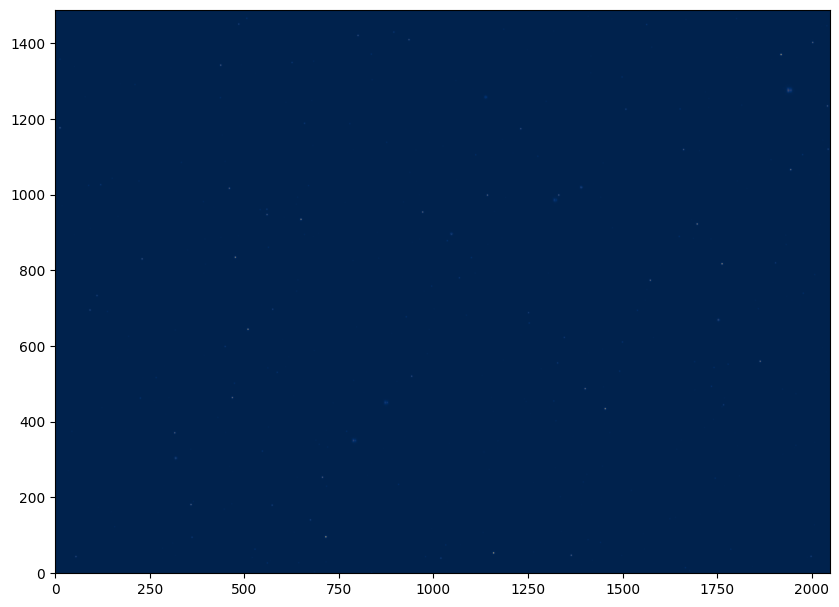

In [121]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(image2, origin='lower', cmap='cividis')